In [20]:
import boto3
from braket.aws import AwsDevice
from braket.circuits import Circuit
import matplotlib.pyplot as plt

In [2]:
aws_account_id = boto3.client("sts").get_caller_identity()["Account"]

In [3]:
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")

In [14]:
s3_folder = ("amazon-braket-bdad00ce9baa", "folder-name")

In [15]:
bell = Circuit().h(0).cnot(0, 1)

In [16]:
print(bell)

T  : |0|1|
          
q0 : -H-C-
        | 
q1 : ---X-

T  : |0|1|


In [17]:
task = device.run(bell, s3_folder, shots=100)


In [18]:
counts = task.result().measurement_counts
print(counts)

Counter({'00': 55, '11': 45})


<BarContainer object of 2 artists>

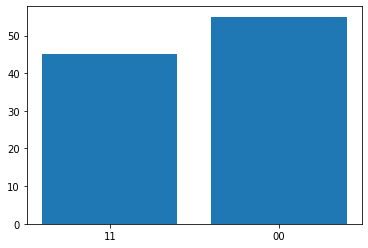

In [21]:
plt.bar(counts.keys(), counts.values())